In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
from wordcloud import WordCloud
from requests import get
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import acquire
import prepare
from sklearn.model_selection import train_test_split

In [2]:
df = prepare.git_df()

In [3]:
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [4]:
# def basic_clean(string):
#     '''This function takes in a string and lowercases everything, normalizes unicode characters, and replaces
#         anything that is not a letter, number, whits space, or single quote. It returns the cleaned string.'''
#     cleaned = []
#     string = string.str.lower()
#     for item in string:
#         item = unicodedata.normalize('NFKD', item).encode('ascii', 'ignore').decode('utf-8')
#         item = item.replace('\n','')
#         item = re.sub(r'[^a-z\s]', '', item)
#         #item = re.sub(r'[.{,20}$]', ' ', item)
#         #item = item.replace('/','')
#         #item = item.strip()
#         item = re.sub(r'[^[a-z]{3,15}\s]', '', item)
#         for word in item:
#             if len(word) > 15:
#                 del word
#         cleaned.append(item)
#     return cleaned

In [5]:
# cleaned = basic_clean(df.readme_contents)

In [6]:
# cleaned

In [7]:
# def tokenize(string):
#     token = []
#     tokenizer = nltk.tokenize.ToktokTokenizer()
#     for item in string:
#         item = tokenizer.tokenize(item, return_str=True)
#         token.append(item)
#     return token

In [8]:
# cleaned = tokenize(cleaned)

In [9]:
# df['clean'] = cleaned

In [10]:
# df.clean = df.clean.str.replace('\n', '').str.replace('/','')

In [11]:
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [12]:
# def lemmatize(string):
#     wnl = nltk.stem.WordNetLemmatizer()
#     lemlem = []
#     for item in string:
#         lems = [wnl.lemmatize(word) for word in item.split()]
#         article_lemmatized = ' '.join(lems)
#         lemlem.append(article_lemmatized)
#     return lemlem

In [13]:
# lemmed = lemmatize(df.clean)

In [14]:
# df['lemmatized'] = lemmed

In [15]:
# def remove_stopwords(string, extra_words=[], exclude_words=[]):
#     '''This function takes in a dataframe column and optional parameters and returns each observation in the column
#         with the stopwords removed.'''
#     stop_list = stopwords.words('english')
#     stopped = []
#     for item in string:
#         for word in extra_words:
#             if item not in stop_list:
#                 stop_list.append(word)
#         for word in exclude_words:    
#             if item in stop_list:
#                 stop_list.remove(word) 
#         words = item.split()
#         words_stopped = [word for word in words if word not in stop_list]
#         article_stopped = ' '.join(words_stopped)
#         stopped.append(article_stopped)
#     return stopped

In [16]:
# df['stopped'] = remove_stopwords(df.lemmatized, extra_words=['https','http','com','org','github'])

In [17]:
df.language = df.language.str.lower()

In [18]:
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,c#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,javascript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,c,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,c++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,c++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,jupyter notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             600 non-null    object
 1   language         600 non-null    object
 2   original         600 non-null    object
 3   clean            600 non-null    object
 4   stemmed          600 non-null    object
 5   lemmatized       600 non-null    object
 6   original_length  600 non-null    int64 
 7   true_clean       600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


In [20]:
df = df.dropna()

In [21]:
df.language.value_counts()

php                 108
c++                 107
python              106
c                   102
html                 83
javascript           20
java                 20
jupyter notebook     20
c#                   18
typescript           16
Name: language, dtype: int64

In [22]:
df.language = df.language.str.replace('javascript','other').str.replace('java','other').str.replace('c#','other').str.replace('typescript','other').str.replace('jupyter notebook','other')
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,other,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,other,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,c,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,c++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,c++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,other,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [23]:
def split_data(df, column):
    '''This function takes in two arguments, a dataframe and a string. The string argument is the name of the
        column that will be used to stratify the train_test_split. The function returns three dataframes, a 
        training dataframe with 60 percent of the data, a validate dataframe with 20 percent of the data and test
        dataframe with 20 percent of the data.'''
    train, test = train_test_split(df, test_size=.2, random_state=217, stratify=df[column])
    train, validate = train_test_split(train, test_size=.25, random_state=217, stratify=train[column])
    return train, validate, test

In [24]:
train, validate, test = split_data(df, 'language')

In [25]:
ADDITIONAL_STOPWORDS = ['yes']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [26]:
python_words = clean(' '.join(train[train.language == 'python']['true_clean']))
c_words = clean(' '.join(train[train.language == 'c']['true_clean']))
php_words = clean(' '.join(train[train.language == 'php']['true_clean']))
cplus_words = clean(' '.join(train[train.language == 'c++']['true_clean']))
html_words = clean(' '.join(train[train.language == 'html']['true_clean']))
other_words = clean(' '.join(train[train.language == 'other']['true_clean']))
all_words = clean(' '.join(train['true_clean']))

In [27]:
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
php_freq = pd.Series(php_words).value_counts()
cplus_freq = pd.Series(cplus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [28]:
python_freq

python        1393
file           661
code           546
star           527
model          405
              ... 
tough            1
forgive          1
settlement       1
judgment         1
ridge            1
Length: 4563, dtype: int64

In [29]:
php_freq

value          208
file           198
client         182
security       175
version        160
              ... 
combination      1
superb           1
yeah             1
casting          1
assure           1
Length: 2258, dtype: int64

In [30]:
cplus_freq

build         381
medium        303
install       229
file          227
version       222
             ... 
romanian        1
portuguese      1
norwegian       1
japanese        1
easiest         1
Length: 3008, dtype: int64

In [31]:
c_freq

example       365
node          325
file          316
build         314
message       256
             ... 
pete            1
groundwork      1
escape          1
shielding       1
showing         1
Length: 2920, dtype: int64

In [32]:
html_freq

heavy       1714
minus       1711
sign        1710
lecture      417
learning     361
            ... 
extra          1
sized          1
perfect        1
comb           1
ongoing        1
Length: 2512, dtype: int64

In [33]:
word_counts = pd.concat([python_freq, c_freq, php_freq, cplus_freq, html_freq, other_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['python','c','php','cplus','html','other','all']
word_counts.head()

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
file,661,316,198,227,122,166,1690
code,546,198,149,211,155,301,1560
star,527,2,8,6,11,9,563
model,405,15,71,62,46,190,789


In [34]:
word_counts.sort_values('all', ascending=False)

,python,c,php,cplus,html,other,all
python,1393,45,33,185,20,133,1809
sign,8,1,6,8,1710,9,1742
heavy,3,2,0,0,1714,1,1720
minus,1,1,1,0,1711,0,1714
file,661,316,198,227,122,166,1690
...,...,...,...,...,...,...,...
ecology,0,1,0,0,0,0,1
modulus,0,1,0,0,0,0,1
indefinitely,0,1,0,0,0,0,1
distant,0,1,0,0,0,0,1


<AxesSubplot:>

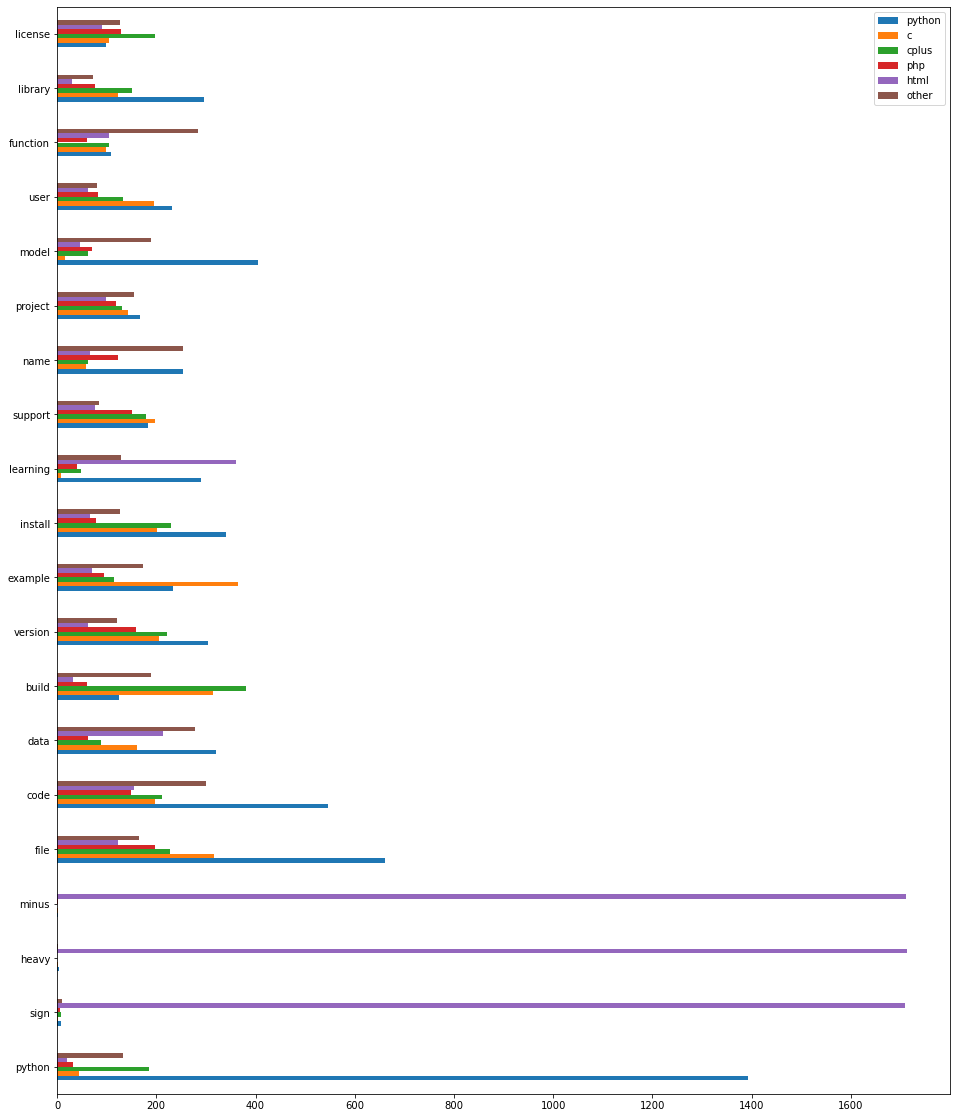

In [35]:
word_counts.sort_values(
    'all', ascending=False
)[['python','c','cplus','php','html','other']].head(20).plot.barh(figsize=[16,20])

<AxesSubplot:>

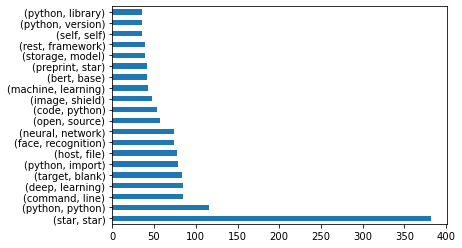

In [36]:
pd.Series(nltk.bigrams(python_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

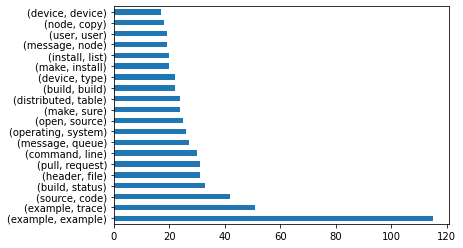

In [37]:
pd.Series(nltk.bigrams(c_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

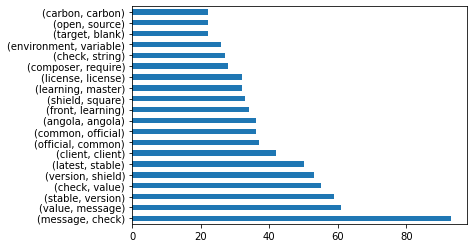

In [38]:
pd.Series(nltk.bigrams(php_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

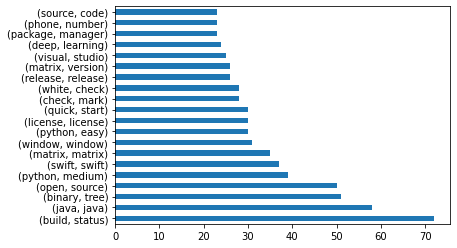

In [39]:
pd.Series(nltk.bigrams(cplus_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

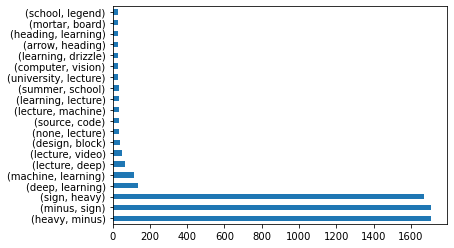

In [40]:
pd.Series(nltk.bigrams(html_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

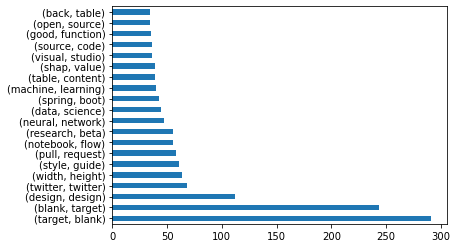

In [41]:
pd.Series(nltk.bigrams(other_words)
         ).value_counts().head(20).plot.barh()

In [42]:
train.language.value_counts()

c++       65
python    64
php       64
c         61
other     56
html      50
Name: language, dtype: int64

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(all_words)

In [44]:
bag_of_words

<188154x7273 sparse matrix of type '<class 'numpy.int64'>'
	with 188154 stored elements in Compressed Sparse Row format>

In [45]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [46]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [47]:
bow

,aaron,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,abigail,...,young,youve,zach,zend,zephyr,zero,zigzag,zing,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
bow.apply(lambda row: row / row.sum(), axis=1)

,aaron,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,abigail,...,young,youve,zach,zend,zephyr,zero,zigzag,zing,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.true_clean)
pd.DataFrame(bag_of_words.todense(), 
             columns=tfidf.get_feature_names_out())

,aaron,abacus,abandoned,abase,abate,abba,abbreviation,abel,abide,abigail,...,young,youve,zach,zend,zephyr,zero,zigzag,zing,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.014164,0.0,0.0,0.000000,0.0
356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.008798,0.0


In [50]:
# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indeces, and the values into values
pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

aaron        5.502584
abacus       6.195731
abandoned    5.790266
abase        6.195731
abate        6.195731
               ...   
zero         3.392370
zigzag       5.790266
zing         5.790266
zone         4.691653
zoom         6.195731
Length: 7285, dtype: float64

In [51]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_grams = cv.fit_transform(train.true_clean)

In [52]:
pd.DataFrame(bag_of_grams.todense(),
            columns=cv.get_feature_names())

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron conditional,aaron deep,aaron irfan,aaron junker,aaron recurrent,abacus constructor,abandoned favor,abandoned significant,abase entity,abate juan,...,zone important,zone location,zone mass,zone navigable,zone omit,zone threat,zone trend,zone width,zoom keyboard,zoom zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language
X_test = test.true_clean
y_test = test.language

In [55]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.6527777777777778

In [56]:
X_validate_bow = cv.transform(X_validate)
tree.score(X_validate_bow, y_validate)

0.35833333333333334

In [57]:
pd.Series(
    dict(
    zip(cv.get_feature_names(), 
    tree.feature_importances_))).sort_values().tail()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


notebook    0.043782
program     0.052360
build       0.069899
python      0.132994
composer    0.206324
dtype: float64

In [58]:
import model
model.log_model(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.50
              precision    recall  f1-score   support

           c       0.66      0.57      0.61        61
         c++       0.65      0.48      0.55        65
        html       1.00      0.22      0.36        50
       other       0.62      0.57      0.59        56
         php       0.58      0.17      0.27        64
      python       0.34      0.95      0.51        64

    accuracy                           0.50       360
   macro avg       0.64      0.49      0.48       360
weighted avg       0.63      0.50      0.48       360

Accuracy of Logistic Regression classifier on validate set: 0.32


['Log Regression - saga', 0.5027777777777778, 0.31666666666666665]

In [59]:
model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        61
         c++       1.00      0.97      0.98        65
        html       0.88      1.00      0.93        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.48


['Log Regression Balanced', 0.9805555555555555, 0.48333333333333334]

In [60]:
model.bayes_model(X_bow, y_train, X_validate_bow, y_validate)

Multinomial Naive-Bayes
Accuracy of Multinomial Naive-Bayes classifier on training set: 0.88
              precision    recall  f1-score   support

           c       0.95      0.92      0.93        61
         c++       0.78      0.95      0.86        65
        html       0.97      0.66      0.79        50
       other       0.84      0.82      0.83        56
         php       0.91      1.00      0.96        64
      python       0.92      0.89      0.90        64

    accuracy                           0.88       360
   macro avg       0.89      0.87      0.88       360
weighted avg       0.89      0.88      0.88       360

Accuracy of Logistic Regression classifier on validate set: 0.50


['Naive-Bayes Multinomial', 0.8833333333333333, 0.5]

In [61]:
model.rand_forest(X_bow, y_train, X_validate_bow, y_validate, 7, 6)

Accuracy of Random Forest classifier on training set: 0.82
              precision    recall  f1-score   support

           c       0.96      0.82      0.88        61
         c++       0.89      0.88      0.88        65
        html       0.97      0.64      0.77        50
       other       0.98      0.71      0.82        56
         php       0.59      0.98      0.74        64
      python       0.87      0.86      0.87        64

    accuracy                           0.82       360
   macro avg       0.88      0.82      0.83       360
weighted avg       0.87      0.82      0.83       360

Accuracy of Random Forest classifier on validate set: 0.40


['Random Forest', 0.825, 0.4]

In [62]:
model.tree_model(X_bow, y_train, X_validate_bow, y_validate, 6)

Accuracy of Decision Tree classifier on training set: 0.65
              precision    recall  f1-score   support

           c       0.93      0.46      0.62        61
         c++       0.79      0.58      0.67        65
        html       0.33      0.96      0.49        50
       other       0.80      0.57      0.67        56
         php       1.00      0.56      0.72        64
      python       0.85      0.83      0.84        64

    accuracy                           0.65       360
   macro avg       0.79      0.66      0.67       360
weighted avg       0.80      0.65      0.68       360

Accuracy of Decision Tree classifier on validate set: 0.38


['Decision Tree', 0.6527777777777778, 0.38333333333333336]

In [63]:
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [64]:
model.log_model(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.96
              precision    recall  f1-score   support

           c       0.97      0.97      0.97        61
         c++       1.00      0.94      0.97        65
        html       0.84      0.98      0.91        50
       other       1.00      0.95      0.97        56
         php       1.00      1.00      1.00        64
      python       0.97      0.95      0.96        64

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

Accuracy of Logistic Regression classifier on validate set: 0.54


['Log Regression - saga', 0.9638888888888889, 0.5416666666666666]

In [65]:
model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.96
              precision    recall  f1-score   support

           c       0.97      0.95      0.96        61
         c++       1.00      0.94      0.97        65
        html       0.84      0.98      0.91        50
       other       0.98      0.95      0.96        56
         php       1.00      1.00      1.00        64
      python       0.97      0.95      0.96        64

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Accuracy of Logistic Regression classifier on validate set: 0.54


['Log Regression Balanced', 0.9611111111111111, 0.5416666666666666]

In [66]:
model.bayes_model(X_bow, y_train, X_validate_bow, y_validate)

Multinomial Naive-Bayes
Accuracy of Multinomial Naive-Bayes classifier on training set: 0.93
              precision    recall  f1-score   support

           c       0.91      0.97      0.94        61
         c++       0.86      0.98      0.92        65
        html       1.00      0.84      0.91        50
       other       0.98      0.84      0.90        56
         php       0.98      0.98      0.98        64
      python       0.91      0.95      0.93        64

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360

Accuracy of Logistic Regression classifier on validate set: 0.48


['Naive-Bayes Multinomial', 0.9333333333333333, 0.48333333333333334]

In [67]:
model.rand_forest(X_bow, y_train, X_validate_bow, y_validate, 7, 6)

Accuracy of Random Forest classifier on training set: 0.88
              precision    recall  f1-score   support

           c       0.95      0.87      0.91        61
         c++       0.94      0.92      0.93        65
        html       0.78      0.80      0.79        50
       other       0.98      0.77      0.86        56
         php       0.80      1.00      0.89        64
      python       0.89      0.91      0.90        64

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360

Accuracy of Random Forest classifier on validate set: 0.37


['Random Forest', 0.8833333333333333, 0.36666666666666664]

In [68]:
model.tree_model(X_bow, y_train, X_validate_bow, y_validate, 6)

Accuracy of Decision Tree classifier on training set: 0.69
              precision    recall  f1-score   support

           c       0.68      0.82      0.74        61
         c++       0.87      0.60      0.71        65
        html       0.36      0.86      0.51        50
       other       0.77      0.48      0.59        56
         php       1.00      0.64      0.78        64
      python       1.00      0.73      0.85        64

    accuracy                           0.69       360
   macro avg       0.78      0.69      0.70       360
weighted avg       0.80      0.69      0.71       360

Accuracy of Decision Tree classifier on validate set: 0.32


['Decision Tree', 0.6861111111111111, 0.31666666666666665]

In [69]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer(ngram_range=(2, 2))
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.4027777777777778

In [70]:
X_validate_bow = cv.transform(X_validate)
tree.score(X_validate_bow, y_validate)

0.31666666666666665

In [71]:
model.log_model(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.89
              precision    recall  f1-score   support

           c       1.00      0.95      0.97        61
         c++       0.96      0.85      0.90        65
        html       1.00      0.86      0.92        50
       other       0.71      0.98      0.82        56
         php       0.86      0.86      0.86        64
      python       0.93      0.88      0.90        64

    accuracy                           0.89       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.89      0.90       360

Accuracy of Logistic Regression classifier on validate set: 0.38


['Log Regression - saga', 0.8944444444444445, 0.375]

In [72]:
model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        61
         c++       1.00      0.97      0.98        65
        html       0.88      1.00      0.93        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.44


['Log Regression Balanced', 0.9805555555555555, 0.44166666666666665]

In [73]:
model.bayes_model(X_bow, y_train, X_validate_bow, y_validate)

Multinomial Naive-Bayes
Accuracy of Multinomial Naive-Bayes classifier on training set: 0.98
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        61
         c++       0.92      1.00      0.96        65
        html       1.00      0.96      0.98        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       0.98      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.56


['Naive-Bayes Multinomial', 0.9805555555555555, 0.5583333333333333]

In [74]:
model.rand_forest(X_bow, y_train, X_validate_bow, y_validate, 7, 6)

Accuracy of Random Forest classifier on training set: 0.44
              precision    recall  f1-score   support

           c       0.94      0.28      0.43        61
         c++       0.40      0.68      0.51        65
        html       0.00      0.00      0.00        50
       other       0.00      0.00      0.00        56
         php       0.36      0.95      0.52        64
      python       0.61      0.59      0.60        64

    accuracy                           0.44       360
   macro avg       0.39      0.42      0.34       360
weighted avg       0.41      0.44      0.36       360

Accuracy of Random Forest classifier on validate set: 0.38


['Random Forest', 0.4444444444444444, 0.38333333333333336]

In [75]:
model.tree_model(X_bow, y_train, X_validate_bow, y_validate, 6)

Accuracy of Decision Tree classifier on training set: 0.40
              precision    recall  f1-score   support

           c       0.22      0.97      0.36        61
         c++       1.00      0.08      0.14        65
        html       1.00      0.02      0.04        50
       other       1.00      0.23      0.38        56
         php       0.89      0.50      0.64        64
      python       0.95      0.55      0.69        64

    accuracy                           0.40       360
   macro avg       0.84      0.39      0.38       360
weighted avg       0.84      0.40      0.39       360

Accuracy of Decision Tree classifier on validate set: 0.33


['Decision Tree', 0.4027777777777778, 0.325]

In [76]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [77]:
model.log_model(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           c       0.91      1.00      0.95        61
         c++       1.00      0.97      0.98        65
        html       1.00      0.98      0.99        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.56


['Log Regression - saga', 0.9833333333333333, 0.5583333333333333]

In [78]:
model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.98
              precision    recall  f1-score   support

           c       0.91      1.00      0.95        61
         c++       1.00      0.97      0.98        65
        html       1.00      0.98      0.99        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.56


['Log Regression Balanced', 0.9833333333333333, 0.5583333333333333]

In [79]:
model.bayes_model(X_bow, y_train, X_validate_bow, y_validate)

Multinomial Naive-Bayes
Accuracy of Multinomial Naive-Bayes classifier on training set: 0.98
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        61
         c++       0.92      1.00      0.96        65
        html       1.00      0.98      0.99        50
       other       1.00      0.98      0.99        56
         php       1.00      1.00      1.00        64
      python       1.00      0.97      0.98        64

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy of Logistic Regression classifier on validate set: 0.48


['Naive-Bayes Multinomial', 0.9833333333333333, 0.48333333333333334]

In [80]:
model.rand_forest(X_bow, y_train, X_validate_bow, y_validate, 7, 6)

Accuracy of Random Forest classifier on training set: 0.44
              precision    recall  f1-score   support

           c       0.79      0.18      0.29        61
         c++       0.37      0.77      0.50        65
        html       0.00      0.00      0.00        50
       other       1.00      0.02      0.04        56
         php       0.37      0.94      0.53        64
      python       0.70      0.55      0.61        64

    accuracy                           0.44       360
   macro avg       0.54      0.41      0.33       360
weighted avg       0.55      0.44      0.35       360

Accuracy of Random Forest classifier on validate set: 0.35


['Random Forest', 0.4361111111111111, 0.35]

In [81]:
model.tree_model(X_bow, y_train, X_validate_bow, y_validate, 5)

Accuracy of Decision Tree classifier on training set: 0.38
              precision    recall  f1-score   support

           c       0.82      0.15      0.25        61
         c++       0.22      0.97      0.36        65
        html       1.00      0.02      0.04        50
       other       1.00      0.07      0.13        56
         php       0.97      0.50      0.66        64
      python       1.00      0.41      0.58        64

    accuracy                           0.38       360
   macro avg       0.83      0.35      0.34       360
weighted avg       0.82      0.38      0.35       360

Accuracy of Decision Tree classifier on validate set: 0.30


['Decision Tree', 0.375, 0.3]

In [82]:
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train)
X_test = test.true_clean
y_test = test.language
X_test_bow = tfidf.transform(X_test)

In [83]:
model.test_log_balanced(X_bow, y_train, X_test_bow, y_test)

Accuracy of Logistic Regression classifier on training set: 0.96
              precision    recall  f1-score   support

           c       0.97      0.95      0.96        61
         c++       1.00      0.94      0.97        65
        html       0.84      0.98      0.91        50
       other       0.98      0.95      0.96        56
         php       1.00      1.00      1.00        64
      python       0.97      0.95      0.96        64

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Accuracy of Logistic Regression classifier on test set:     0.49
              precision    recall  f1-score   support

           c       0.40      0.50      0.44        20
         c++       0.28      0.24      0.26        21
        html       0.37      0.59      0.45        17
       other       0.58      0.37      0.45        19
         php       0.85      0.77      0.81        22
  

In [88]:
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train)
X_validate_bow = tfidf.transform(X_validate)

In [89]:
m1 = model.tree_model(X_bow, y_train, X_validate_bow, y_validate, 5)
m2 = model.log_model(X_bow, y_train, X_validate_bow, y_validate)
m3 = model.bayes_model(X_bow, y_train, X_validate_bow, y_validate)
m4 = model.log_model_balanced(X_bow, y_train, X_validate_bow, y_validate)

Accuracy of Decision Tree classifier on training set: 0.63
              precision    recall  f1-score   support

           c       0.65      0.59      0.62        61
         c++       0.77      0.57      0.65        65
        html       0.33      0.84      0.47        50
       other       0.69      0.43      0.53        56
         php       0.91      0.64      0.75        64
      python       0.94      0.73      0.82        64

    accuracy                           0.63       360
   macro avg       0.72      0.63      0.64       360
weighted avg       0.73      0.63      0.65       360

Accuracy of Decision Tree classifier on validate set: 0.32
Logistic Regression using selected features
Accuracy of Logistic Regression classifier on training set: 0.96
              precision    recall  f1-score   support

           c       0.97      0.97      0.97        61
         c++       1.00      0.94      0.97        65
        html       0.84      0.98      0.91        50
       other 

In [90]:
model.model_performance(m1, m2, m3, m4)

,Model,Train Accuracy,Validate Accuracy
0,Decision Tree,0.630556,0.316667
1,Log Regression - saga,0.963889,0.541667
2,Naive-Bayes Multinomial,0.933333,0.483333
3,Log Regression Balanced,0.961111,0.541667
